<a href="https://colab.research.google.com/github/fiza-azam/Machine-Learning-Projects/blob/main/NLP_Projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [ ]:
!pip install demoji
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 13 kB/s 


In [ ]:
import demoji
demoji.download_codes()
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO
import re

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import sqlite3
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from operator import itemgetter
from matplotlib import pyplot as plt
from google.colab import drive
from nltk.stem import WordNetLemmatizer
import csv
import sqlite3


In [ ]:
#  functions
def remove_emoji_and_emoticons(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, " ".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").replace("_", " ").split()))

    for emot in EMOTICONS_EMO:
        text = text.replace(emot, " ".join(EMOTICONS_EMO[emot].replace(",","").replace(":","").split()))

    return text

def remove_urls(text):
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
  text = re.sub(r'pic.twitter.com/[\w]*',"", text)
  return text

In [ ]:
def tweet_to_words(raw_tweet):
    # input a string (a single tweet)

    # Removing non-letters
    letters_only = re.sub("[^a-zA-Z]", " ", raw_tweet)

    # convert to lower case
    words = letters_only.lower().split()

    # customize the list of stopwords
    first_person_pronouns = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves"]
    stoplist = stopwords.words("english")

    for pronoun in first_person_pronouns:
        stoplist.remove(pronoun)

    stops = set(stoplist) # convert stopwords to list

    meaningful_words = [w for w in words if not w in stops]

    #-----update: Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_words=[]
    for x in meaningful_words:             #we need to provide the context in which we want to lemmatize that is the parts-of-speech (POS).
       b=lemmatizer.lemmatize(x, pos="v")  #This is done by giving the value for pos parameter in wordnet_lemmatizer.lemmatize
       lemmatized_words.append(b)

    # join the words back in one string seperated by a space
    #----update: changed input from meaningful_words to lemmatized_words
    return(" ".join(lemmatized_words))

In [ ]:
# test cleaning
sample_text = "Hi 😊 @Xenia_Wings Sorry 🙇‍♂️🙇‍♂️ Yes 23 Hobi...	"
result = remove_emoji_and_emoticons(sample_text)
print(result)

Hi smiling face with smiling eyes @Xenia_Wings Sorry person bowing‍male sign️person bowing‍male sign️ Yes 23 Hobi...	


In [ ]:
def sqlite(db, table):
  # Create a SQL connection to our SQLite database
  con = sqlite3.connect("/content/drive/MyDrive/BDA Semester Project/Data/"+db)
  df = pd.read_sql_query("SELECT * from"+" "+table, con)
  #print(df.head())
  con.close()
  return df


In [ ]:
def data_preprocessing(inputFile, outputFile):
  #data = pd.read_csv(inputFile)
  data = inputFile
  tweets = data["tweets"]
  listTweets = tweets.values.tolist()
  clean_tweets = []
  for x in range(0,378):
    tweet = remove_urls(listTweets[x])
    tweet = remove_emoji_and_emoticons(tweet)
    tweet = tweet_to_words(tweet)
    clean_tweets.append(tweet)
  data = data.drop('tweets', 1)
  data['tweets'] = clean_tweets
  data.to_csv(outputFile)
  return data, clean_tweets

In [ ]:
#Week Data
data = sqlite("Final_tweets.db", "depressed_users2")
cleanDF, cleanList = data_preprocessing(data, "/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_week_clean.csv")

In [ ]:
#Month Data
data = sqlite("Final_tweets.db", "depressed_users_month")
cleanDF, cleanList = data_preprocessing(data, "/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_month_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [ ]:
#3200 Data
data = sqlite("Final_tweets.db", "depressed_users_3200")
cleanDF, cleanList = data_preprocessing(data, "/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_3200_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [ ]:
# apply the dtype attribute
result = cleanDF.dtypes

print("Output:")
print(result)

Output:
username     object
age           int64
depressed     int64
count         int64
tweets       object
dtype: object


#Full Data Common Words


In [ ]:
!pip install wordcloud


In [ ]:
from os import path
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
#  functions
def remove_emoji_and_emoticons_fullData(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, '')

    for emot in EMOTICONS_EMO:
        text = text.replace(emot, '')

    text = text.replace('  ', ' ')

    return text

def remove_urls(text):
  text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text, flags=re.MULTILINE)
  text = re.sub(r'pic.twitter.com/[\w]*',"", text)
  return text

In [ ]:
sample_text = "Hi 😊 @Xenia_Wings Sorry 🙇‍♂️🙇‍♂️ Yes 23 Hobi...	"
result = remove_emoji_and_emoticons_fullData(sample_text)
result2 = remove_urls(result)
print(result2)

Hi @Xenia_Wings Sorry ‍️‍️ Yes 23 Hobi...	


In [ ]:
def data_preprocessing_fullData(inputFile, outputFile):
  #data = pd.read_csv(inputFile)
  data = inputFile
  tweets = data["tweets"]
  listTweets = tweets.values.tolist()
  clean_tweets = []
  for x in range(0,378):
    tweet = remove_urls(listTweets[x])
    tweet = remove_emoji_and_emoticons_fullData(tweet)
    tweet = tweet_to_words(tweet)
    clean_tweets.append(tweet)
  data = data.drop('tweets', 1)
  data['tweets'] = clean_tweets
  data.to_csv(outputFile)
  return data, clean_tweets

In [ ]:
Fulldata = sqlite("Final_tweets.db", "depressed_users_3200")

In [ ]:
Fulldata.shape

(378, 5)

In [ ]:
FullCleanDF, FullCleanList = data_preprocessing_fullData(Fulldata, "/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_FullData_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


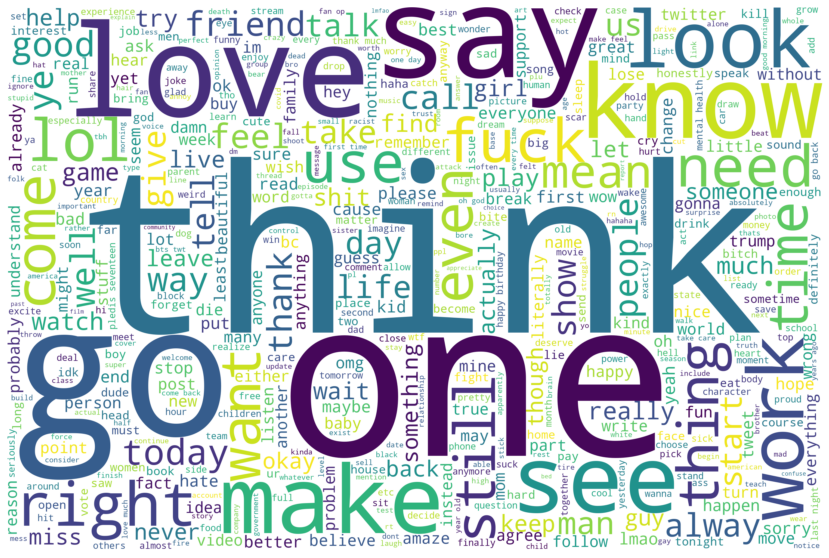

In [ ]:
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(' '.join(FullCleanDF['tweets']))
# set the word color to black
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Data/depressed_full_data.png')

No stop words shown


#Control Data


In [ ]:
def data_preprocessing_control(inputFile, outputFile):
  data = inputFile
  tweets = data["tweets"]
  listTweets = tweets.values.tolist()
  clean_tweets = []
  for x in range(0,307):
    tweet = remove_urls(listTweets[x])
    tweet = remove_emoji_and_emoticons(tweet)
    tweet = tweet_to_words(tweet)
    clean_tweets.append(tweet)
  data = data.drop('tweets', 1)
  data['tweets'] = clean_tweets
  data.to_csv(outputFile)
  return data, clean_tweets

In [ ]:
dataControl = sqlite("Final_tweets_control.db", "control_users2")

In [ ]:
#Week data
ControlCleanDF, ControlCleanList = data_preprocessing_control(dataControl, "/content/drive/MyDrive/BDA Semester Project/Data/control_users_week_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#Month Data
dataControl = sqlite("Final_tweets_control.db", "control_users_month")
ControlCleanDF, ControlCleanList = data_preprocessing_control(dataControl, "/content/drive/MyDrive/BDA Semester Project/Data/control_users_month_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#3200 Data
dataControl = sqlite("Final_tweets_control.db", "control_users_3200")
ControlCleanDF, ControlCleanList = data_preprocessing_control(dataControl, "/content/drive/MyDrive/BDA Semester Project/Data/control_users_3200_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


#Full Control Data Common Words

In [ ]:
def data_preprocessing_fullData_control(inputFile, outputFile):
  #data = pd.read_csv(inputFile)
  data = inputFile
  tweets = data["tweets"]
  listTweets = tweets.values.tolist()
  clean_tweets = []
  for x in range(0,307):
    tweet = remove_urls(listTweets[x])
    tweet = remove_emoji_and_emoticons_fullData(tweet)
    tweet = tweet_to_words(tweet)
    clean_tweets.append(tweet)
  data = data.drop('tweets', 1)
  data['tweets'] = clean_tweets
  data.to_csv(outputFile)
  return data, clean_tweets

In [ ]:
dataControl = sqlite("Final_tweets_control.db", "control_users_3200")

In [ ]:
ControlCleanDF, ControlCleanList = data_preprocessing_fullData_control(dataControl, "/content/drive/MyDrive/BDA Semester Project/Data/control_users_FullData_clean.csv")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


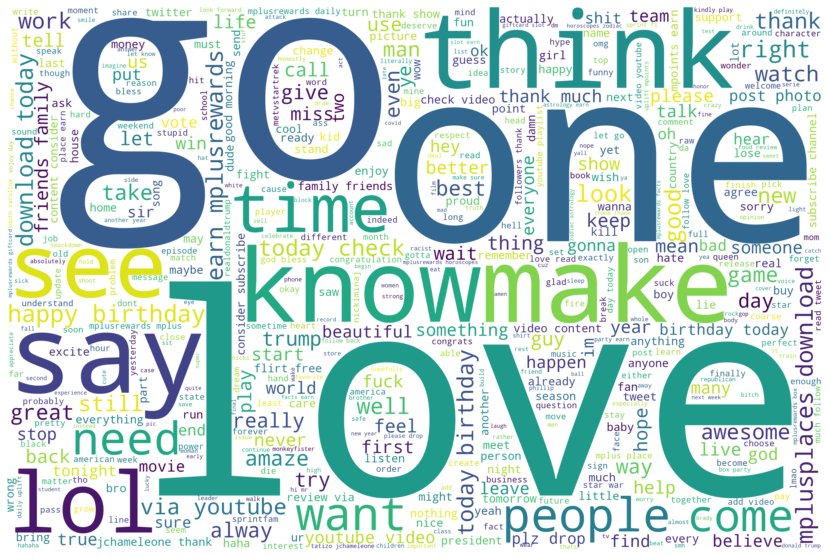

In [ ]:
# set the wordcloud background color to white
# set max_words to 1000
# set width and height to higher quality, 3000 x 2000
wordcloud = WordCloud(background_color="white", width=3000, height=2000, max_words=500).generate(' '.join(ControlCleanDF['tweets']))
# set the word color to black
# set the figsize
plt.figure(figsize=[15,10])
# plot the wordcloud
plt.imshow(wordcloud, interpolation="bilinear")
# remove plot axes
plt.axis("off")
# save the image
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Data/control_full_data.png')

#Data Visualization

Depress Data

In [ ]:
dweek = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_week_clean.csv')
dmonth = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_month_clean.csv')
dfull = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Data/depressed_users_3200_clean.csv')

1. Total Number of tweets in each datset
2. Frequent words in 3200 dataset

In [ ]:
#Total Tweets in all datasets
week = dweek['count'].sum()
month = dmonth['count'].sum()
full = dfull['count'].sum()

In [ ]:
Dict = {'Week': week, 'Month': month, 'Full': full}

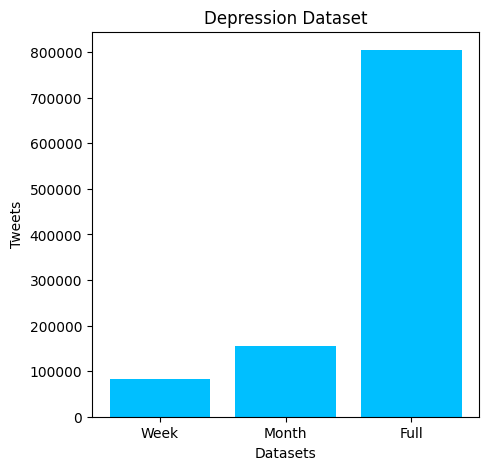

In [ ]:
keys = Dict.keys()
values = Dict.values()

plt.figure(figsize=(5,5))
plt.title("Depression Dataset")
plt.ylabel("Tweets")
plt.xlabel("Datasets")
plt.bar(keys, values, color=['deepskyblue'])
plt.show()

In [ ]:
Dict

{'Full': 804643, 'Month': 156165, 'Week': 82077}

#Extra visualization without stopwords

In [ ]:
# This step is performed to visualize data withiut stop words

from collections import Counter

data_set = ' '.join(dfull['tweets'])

words = data_set.lower().split()

# customize the list of stopwords
stoplist = stopwords.words("english")

stops = set(stoplist) # convert stopwords to list

meaningful_words = [w for w in words if not w in stops]

listToStr = ' '.join([str(elem) for elem in meaningful_words])

split_it = listToStr.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)

[('face', 116060), ('get', 67788), ('like', 61060), ('heart', 50157), ('go', 48202), ('tear', 41772), ('people', 40077), ('love', 39165), ('make', 37709), ('know', 37123), ('one', 36397), ('think', 35965), ('say', 32991), ('time', 30752), ('cry', 30086), ('want', 29101), ('see', 27636), ('smile', 26926), ('good', 26221), ('need', 25777)]


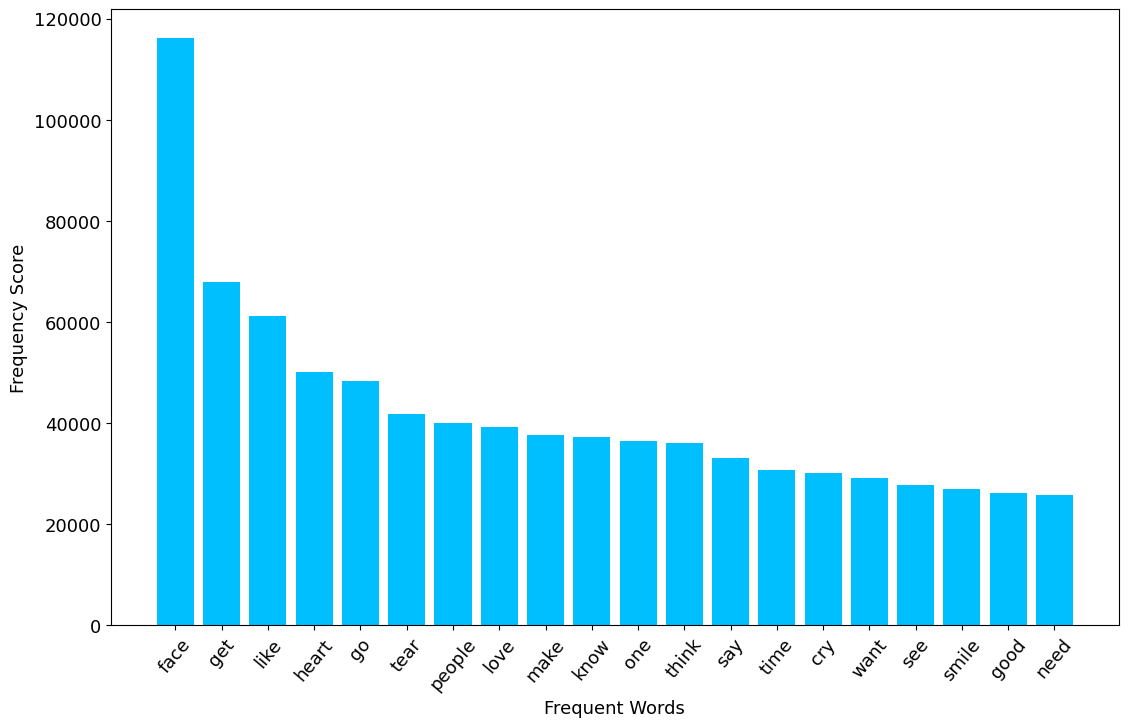

In [ ]:
# sort in-place from highest to lowest
most_occur.sort(key=lambda x: x[1], reverse=True)
plt.rcParams.update(plt.rcParamsDefault)
# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent
plt.figure(figsize=(13,8))

plt.rcParams.update({'font.size': 13})

word = list(zip(*most_occur))[0]
frequency = list(zip(*most_occur))[1]

#'paleturquoise'
plt.xticks(rotation=50)
plt.bar(word, frequency, color=['deepskyblue'])
plt.ylabel('Frequency Score')
plt.xlabel('Frequent Words')
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Data/depress_word_frequency.png')
plt.show()

#continue

In [ ]:
#Printing Most common words in full dataset

# Python program to find the k most frequent words
# from data set
from collections import Counter

data_set = ' '.join(dfull['tweets'])

# split() returns list of all the words in the string
split_it = data_set.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)

[('i', 465741), ('my', 135992), ('face', 116060), ('me', 89090), ('get', 67788), ('like', 61060), ('heart', 50157), ('we', 48417), ('go', 48202), ('tear', 41772), ('people', 40077), ('love', 39165), ('make', 37709), ('know', 37123), ('one', 36397), ('think', 35965), ('say', 32991), ('time', 30752), ('cry', 30086), ('want', 29101)]


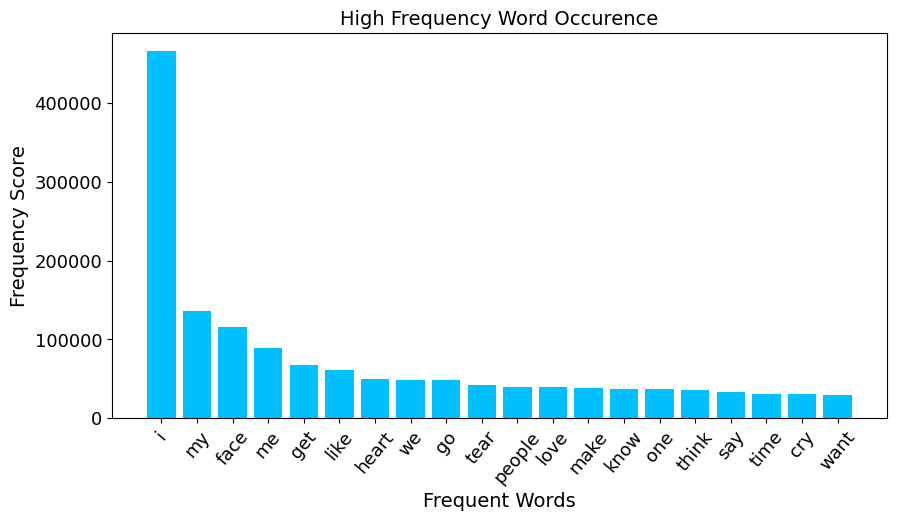

In [ ]:
# sort in-place from highest to lowest
most_occur.sort(key=lambda x: x[1], reverse=True)
plt.rcParams.update(plt.rcParamsDefault)
# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent
plt.figure(figsize=(10,5))

plt.rcParams.update({'font.size': 13})

word = list(zip(*most_occur))[0]
frequency = list(zip(*most_occur))[1]


plt.xticks(rotation=50)
plt.bar(word, frequency, color=['deepskyblue'])
plt.title('High Frequency Word Occurence', fontsize=14)
plt.ylabel('Frequency Score', fontsize=14)
plt.xlabel('Frequent Words', fontsize=14)
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Figures/depress_word_frequency1.png', bbox_inches = 'tight')
plt.show()


Control Data

In [ ]:
cweek = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Data/control_users_week_clean.csv')
cmonth = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Data/control_users_month_clean.csv')
cfull = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Data/control_users_3200_clean.csv')

In [ ]:
#Total Tweets in all datasets
weekc = cweek['count'].sum()
monthc = cmonth['count'].sum()
fullc = cfull['count'].sum()

In [ ]:
Cdict = {'Week': weekc, 'Month': monthc, 'Full': fullc}

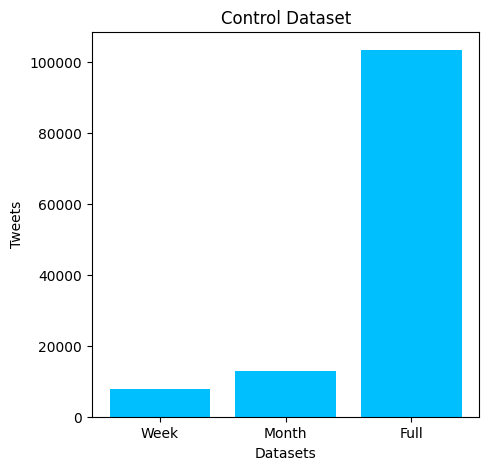

In [ ]:
Ckeys = Cdict.keys()
Cvalues = Cdict.values()

plt.figure(figsize=(5,5))
plt.title("Control Dataset")
plt.ylabel("Tweets")
plt.xlabel("Datasets")
plt.bar(Ckeys, Cvalues, color=['deepskyblue'])
plt.show()

In [ ]:
Cdict

{'Full': 103325, 'Month': 12815, 'Week': 7699}

#Extra visualization without stopwords

In [ ]:
# This step is performed to visualize data withiut stop words

from collections import Counter

data_set = ' '.join(cfull['tweets'])

words = data_set.lower().split()

# customize the list of stopwords
stoplist = stopwords.words("english")

stops = set(stoplist) # convert stopwords to list

meaningful_words = [w for w in words if not w in stops]

listToStr = ' '.join([str(elem) for elem in meaningful_words])

split_it = listToStr.split()

# Pass the split_it list to instance of Counter class.
Counter = Counter(split_it)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur = Counter.most_common(20)

print(most_occur)

[('face', 13191), ('get', 6778), ('like', 6132), ('happy', 5929), ('heart', 5613), ('today', 5567), ('love', 5328), ('thank', 5053), ('go', 4998), ('birthday', 4524), ('smile', 4107), ('one', 4078), ('good', 3636), ('make', 3615), ('see', 3593), ('time', 3550), ('tear', 3511), ('day', 3470), ('say', 3435), ('know', 3243)]


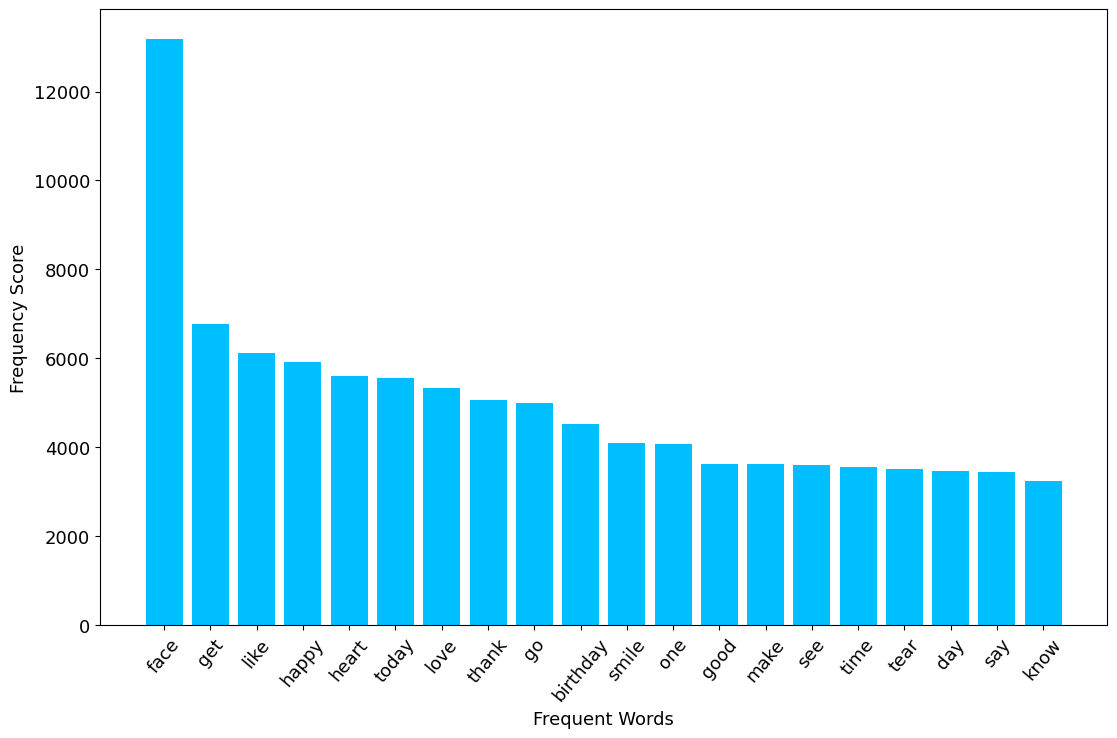

In [ ]:
# sort in-place from highest to lowest
most_occur.sort(key=lambda x: x[1], reverse=True)
plt.rcParams.update(plt.rcParamsDefault)
# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent
plt.figure(figsize=(13,8))

plt.rcParams.update({'font.size': 13})

word = list(zip(*most_occur))[0]
frequency = list(zip(*most_occur))[1]

#'paleturquoise'
plt.xticks(rotation=50)
plt.bar(word, frequency, color=['deepskyblue'])
plt.ylabel('Frequency Score')
plt.xlabel('Frequent Words')
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Data/control_word_frequency_without_stop.png')
plt.show()

#continue

In [ ]:
#Printing Most common words in full dataset

# Python program to find the k most frequent words
# from data set
from collections import Counter

data_set_c = ' '.join(cfull['tweets'])

# split() returns list of all the words in the string
split_it_c = data_set_c.split()

# Pass the split_it list to instance of Counter class.
Counter_C = Counter(split_it_c)

# most_common() produces k frequently encountered
# input values and their respective counts.
most_occur_c = Counter_C.most_common(20)

print(most_occur_c)

[('i', 40281), ('my', 15598), ('face', 13191), ('me', 9352), ('get', 6778), ('like', 6132), ('happy', 5929), ('heart', 5613), ('today', 5567), ('we', 5409), ('love', 5328), ('thank', 5053), ('go', 4998), ('birthday', 4524), ('smile', 4107), ('one', 4078), ('good', 3636), ('make', 3615), ('see', 3593), ('time', 3550)]


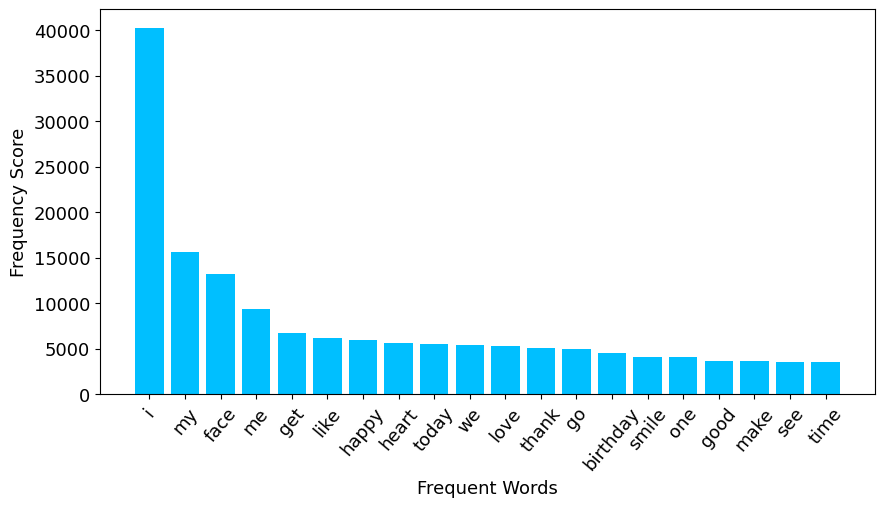

In [ ]:
# sort in-place from highest to lowest
most_occur_c.sort(key=lambda x: x[1], reverse=True)
plt.rcParams.update(plt.rcParamsDefault)
# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent
plt.figure(figsize=(10,5))

plt.rcParams.update({'font.size': 13})

word = list(zip(*most_occur_c))[0]
frequency = list(zip(*most_occur_c))[1]


plt.xticks(rotation=50)
plt.bar(word, frequency, color=['deepskyblue'])
plt.ylabel('Frequency Score')
plt.xlabel('Frequent Words')
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Figures/control_word_frequency1.png')
plt.show()


#Visualizing both together

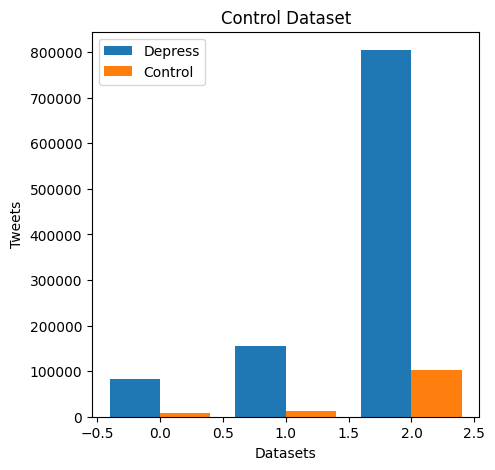

In [ ]:
# Ckeys = Cdict.keys()
# Cvalues = Cdict.values()

# plt.figure(figsize=(5,5))
# plt.title("Control Dataset")
# plt.ylabel("Tweets")
# plt.xlabel("Datasets")
# plt.bar(Ckeys, Cvalues, color=['deepskyblue'])
# plt.show()

# Ckeys = Cdict.keys()
# Cvalues = Cdict.values()

# plt.figure(figsize=(5,5))
# plt.title("Control Dataset")
# plt.ylabel("Tweets")
# plt.xlabel("Datasets")
# plt.bar(Ckeys, Cvalues, color=['deepskyblue'])
# plt.show()

x_axis = np.arange(len(keys))

# Multi bar Chart
plt.figure(figsize=(5,5))
plt.bar(x_axis -0.2, values, width=0.4, label = 'Depress')
plt.bar(x_axis +0.2, Cvalues, width=0.4, label = 'Control')

plt.title("Control Dataset")
plt.ylabel("Tweets")
plt.xlabel("Datasets")


# Add legend

plt.legend()

# Display

plt.show()

1. Deep Neural Net
2. RNN
3. Ensembles
4. Bert
5. Create Dataset

In [ ]:
#Create Datasets
#Append Depress and Control Data
weekData = cweek.append(dweek)
monthData = cmonth.append(dmonth)
fullData = cfull.append(dfull)

In [ ]:
#Shuffle Data
weekData = weekData.sample(frac = 1)
monthData = monthData.sample(frac = 1)
fullData = fullData.sample(frac = 1)

In [ ]:
#Reset Index of the Datasets
weekData=weekData.reset_index(drop=True)
monthData=monthData.reset_index(drop=True)
fullData=fullData.reset_index(drop=True)

In [ ]:
#Remove unamed old index column
weekData = weekData.loc[:, ~weekData.columns.str.contains('^Unnamed')]
monthData = monthData.loc[:, ~monthData.columns.str.contains('^Unnamed')]
fullData = fullData.loc[:, ~fullData.columns.str.contains('^Unnamed')]

In [ ]:
#Save Datasets
weekData.to_csv('/content/drive/MyDrive/BDA Semester Project/Datasets/weekData.csv', index = False)
monthData.to_csv('/content/drive/MyDrive/BDA Semester Project/Datasets/monthData.csv', index = False)
fullData.to_csv('/content/drive/MyDrive/BDA Semester Project/Datasets/fullData.csv', index = False)

In [ ]:
weekData = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Datasets/weekData.csv')
monthData = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Datasets/monthData.csv')
fullData = pd.read_csv('/content/drive/MyDrive/BDA Semester Project/Datasets/fullData.csv')

In [ ]:
#Checking dataframe for null values
weekData.isna().any()

username     False
age          False
depressed    False
count        False
tweets       False
dtype: bool

In [ ]:
monthData.isna().any()

username     False
age          False
depressed    False
count        False
tweets       False
dtype: bool

In [ ]:
fullData.isna().any()

username     False
age          False
depressed    False
count        False
tweets       False
dtype: bool

#Machine Learning

In [ ]:
list_of_age = weekData['age'].to_list()


In [ ]:
unique=[i for i in list_of_age if list_of_age.count(i)==1]

In [ ]:
unique

[67, 49, 60, 12, 62, 55, 48]

In [ ]:
#Inserting age range column since we cannot stratify data based on simply using age since some records have only one age type instance and stratify requires at least 2 instances
bins = [12, 23, 34, 45, 56, 67]
labels = ['12-23', '24-34', '35-45', '46-56', '57-67']
weekData['agerange'] = pd.cut(weekData.age, bins, labels = labels,include_lowest = True)

display(weekData)

username  age  depressed  count  \
0            Wolpido   26          1      2   
1           sickdoIl   23          1    166   
2     Mohamd_ELTaHir   18          0      8   
3         Oppai_Sama   24          0     22   
4    andynor62561579   67          0      7   
..               ...  ...        ...    ...   
680         Abatam01   50          0    129   
681         Lindz304   38          0      1   
682   DeadlyOutlaw35   40          0      8   
683  chukwunekekizi1   25          0     25   
684          bapen17   21          1     21   

                                                tweets agerange  
0    fix thumb itmejp guest list lates thepreshow i...    24-34  
1    i literally would probably need horse tranquil...    12-23  
2    songs bring back memories always learn strong ...    12-23  
3    eslcs list name esl csgo stream picture winstr...    24-34  
4    my draw celebrate colonel tom moore th birtday...    57-67  
..                                                 ...      ...  
680  beirut blast large blast lebanese capital beir...    46-56  
681                                          yo people    35-45  
682  rivercity guy play riki kunio outlawsgeneratio...    35-45  
683  donjazzy i make my first ever transaction vban...    24-34  
684  my antidepressants hurt me i take empty stomac...    12-23  

[685 rows x 6 columns]

In [ ]:
frequency = weekData.agerange.value_counts()
frequency

24-34    341
12-23    245
35-45     72
46-56     18
57-67      9
Name: agerange, dtype: int64

In [ ]:
AgeRangeDict = {'12-23': 245, '24-34': 341, '35-45': 72, '46-56': 18, '57-67': 9}

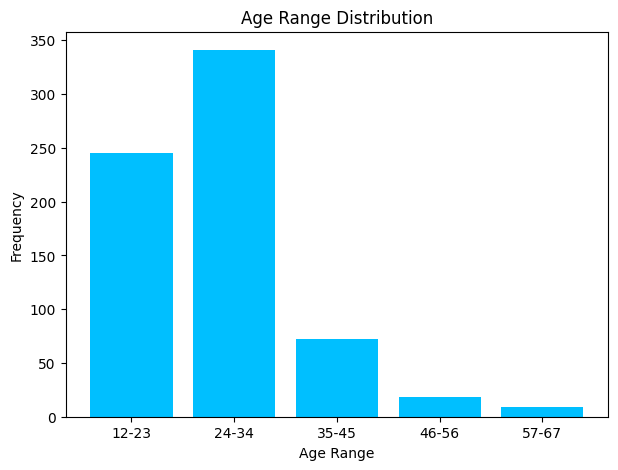

In [ ]:
keys = AgeRangeDict.keys()
values = AgeRangeDict.values()

plt.figure(figsize=(7,5))
plt.title("Age Range Distribution")
plt.ylabel("Frequency")
plt.xlabel("Age Range")
plt.bar(keys, values, color=['deepskyblue'])
plt.savefig('/content/drive/MyDrive/BDA Semester Project/Figures/Age Range Distribution.png')
plt.show()

#Algorithm Implementation

#Week Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(weekData.tweets.values,
                                                  weekData.depressed.values,
                                                  test_size=0.20,
                                                  random_state=17,
                                                  stratify=weekData.agerange.values) #using depressed instead of age for stratifiy

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None)
train_week= vectorizer.fit_transform(X_train)
train_week = train_week.toarray()
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaai', 'aaaaaaaaaaaaaaahhhhhhhhhhhhhhhhh', 'aaaaaaaaaaaaaass', 'aaaaaaaaaaaackk', 'aaaaaaaaaahhhhhhhhhh', 'aaaaaaaaalavhhhhyiuuuuu', 'aaaaaaahh', 'aaaaaahhhh', 'aaaaacckckkkk', 'aaaaahhh', 'aaaaahhhhhhh', 'aaaahhhh', 'aaaannnndddddd', 'aaabshdh', 'aaadeilnrx', 'aaah', 'aaahg', 'aaahhhhfolded', 'aaahhhhh', 'aaaklm', 'aaand', 'aabutin', 'aachen', 'aadhyareddy', 'aagaw', 'aah', 'aahahahaha', 'aahhing', 'aako', 'aal', 'aamiin', 'aang', 'aangat', 'aapi', 'aarifdnial', 'aaron', 'aaronchun', 'aasimar', 'aave', 'aaw', 'aaway', 'aawwww', 'aay', 'aaying', 'ab', 'aback', 'abacusssssss', 'abaddon', 'abadi', 'abahah', 'abandon'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_week = vectorizer.transform(X_val)
test_week = test_week.toarray()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#dataframe for ROC
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
clf = SVC(gamma="auto", cache_size=12000, max_iter=-1)
clf = clf.fit(train_week, y_train)

In [ ]:
#Testing
result = clf.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_svc = classification_report(y_val, result)
print(report_week_svc)

              precision    recall  f1-score   support

           0       0.65      0.89      0.75        62
           1       0.87      0.60      0.71        75

    accuracy                           0.73       137
   macro avg       0.76      0.74      0.73       137
weighted avg       0.77      0.73      0.73       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "SVM",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Random Forest

In [ ]:
#Random Forest
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 42)
# Train the model on training data
rf.fit(train_week, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
#Testing
result = rf.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_rf = classification_report(y_val, result)
print(report_week_rf)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        62
           1       0.83      0.80      0.82        75

    accuracy                           0.80       137
   macro avg       0.80      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "Random Forest",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
lr1.fit(train_week, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#Testing
result = lr1.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_lr = classification_report(y_val, result)
print(report_week_lr)

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        62
           1       0.88      0.85      0.86        75

    accuracy                           0.85       137
   macro avg       0.85      0.85      0.85       137
weighted avg       0.85      0.85      0.85       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "Logistic Regression",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Ensembles

https://www.geeksforgeeks.org/ensemble-methods-in-python/#:~:text=Ensemble%20means%20a%20group%20of,with%20their%20implementation%20in%20Python.

Max Voting Ensembles

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
#Max Voting Ensemble
model_1 = LogisticRegression(max_iter=200)
model_2 = SVC(gamma="auto", cache_size=12000, max_iter=-1)
model_3 = RandomForestClassifier(n_estimators=150)
model_4 = XGBClassifier()
model_5 = tree.DecisionTreeClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('svc', model_2), ('rf', model_3), ('xgb', model_4), ('dt', model_5)], voting='hard')

# training all the model on the train dataset
final_model.fit(train_week, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(test_week)

# printing log loss between actual and predicted value
print(log_loss(y_val, pred_final))

5.798539073410568


In [ ]:
report = classification_report(y_val, pred_final)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        62
           1       0.86      0.83      0.84        75

    accuracy                           0.83       137
   macro avg       0.83      0.83      0.83       137
weighted avg       0.83      0.83      0.83       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, pred_final)
auc = roc_auc_score(y_val, pred_final)

In [ ]:
result_table = result_table.append({'classifiers': "Max Vote Ensemble",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Bagging

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# def evaluation_score (y_test,y_pred):
#     cm = confusion_matrix(y_test,y_pred)
#     print("Confusion Matrix \n", cm)
#     print("Accuracy Score",metrics.accuracy_score(y_test, y_pred))
#     print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
#     print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
#     print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
#     print("F1 Score",metrics.f1_score(y_test, y_pred))
#     print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
#     print("Classification Report \n", metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

https://bobrupakroy.medium.com/bagging-classifier-609a3bce7fb3

In [ ]:
#Bagging
kfold = model_selection.KFold(n_splits=3)
#initialize the base classifier
base_cls = DecisionTreeClassifier()
#no. of base classifiers
num_trees = 500
#bagging classifier
model_classifier = BaggingClassifier(base_estimator = base_cls,n_estimators=num_trees,random_state=3)
results1 = model_selection.cross_val_score(model_classifier,X_train,y_train,cv = kfold)
results1.mean()
# fit the model on the whole dataset
model_classifier.fit(train_week, y_train)
y_pred = model_classifier.predict(test_week)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        62
           1       0.85      0.85      0.85        75

    accuracy                           0.84       137
   macro avg       0.84      0.84      0.84       137
weighted avg       0.84      0.84      0.84       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

In [ ]:
result_table = result_table.append({'classifiers': "Bagging",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Boosting

In [ ]:
#Boosting
# importing machine learning models for prediction
from sklearn.ensemble import GradientBoostingClassifier

# initializing the boosting module with default parameters
model = GradientBoostingClassifier()

# training the model on the train dataset
model.fit(train_week, y_train)

# predicting the output on the test dataset
pred_final = model.predict(test_week)

# # printing the root mean squared error between real value and predicted value
# print(mean_squared_error(test_week, pred_final))

In [ ]:
report = classification_report(y_val, pred_final)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        62
           1       0.81      0.81      0.81        75

    accuracy                           0.80       137
   macro avg       0.79      0.79      0.79       137
weighted avg       0.80      0.80      0.80       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, pred_final)
auc = roc_auc_score(y_val, pred_final)

In [ ]:
result_table = result_table.append({'classifiers': "Boosting",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

In [ ]:
df = result_table

In [ ]:
df

classifiers                              fpr  \
0                  SVM  [0.0, 0.11290322580645161, 1.0]   
1        Random Forest   [0.0, 0.1935483870967742, 1.0]   
2  Logistic Regression  [0.0, 0.14516129032258066, 1.0]   
3    Max Vote Ensemble  [0.0, 0.16129032258064516, 1.0]   
4              Bagging   [0.0, 0.1774193548387097, 1.0]   
5             Boosting  [0.0, 0.22580645161290322, 1.0]   

                              tpr       auc  
0                 [0.0, 0.6, 1.0]  0.743548  
1                 [0.0, 0.8, 1.0]  0.803226  
2  [0.0, 0.8533333333333334, 1.0]  0.854086  
3  [0.0, 0.8266666666666667, 1.0]  0.832688  
4  [0.0, 0.8533333333333334, 1.0]  0.837957  
5  [0.0, 0.8133333333333334, 1.0]  0.793763

In [ ]:
result_table

fpr  \
classifiers                                            
SVM                  [0.0, 0.11290322580645161, 1.0]   
Random Forest         [0.0, 0.1935483870967742, 1.0]   
Logistic Regression  [0.0, 0.14516129032258066, 1.0]   
Max Vote Ensemble    [0.0, 0.16129032258064516, 1.0]   
Bagging               [0.0, 0.1774193548387097, 1.0]   
Boosting             [0.0, 0.22580645161290322, 1.0]   

                                                tpr       auc  
classifiers                                                    
SVM                                 [0.0, 0.6, 1.0]  0.743548  
Random Forest                       [0.0, 0.8, 1.0]  0.803226  
Logistic Regression  [0.0, 0.8533333333333334, 1.0]  0.854086  
Max Vote Ensemble    [0.0, 0.8266666666666667, 1.0]  0.832688  
Bagging              [0.0, 0.8533333333333334, 1.0]  0.837957  
Boosting             [0.0, 0.8133333333333334, 1.0]  0.793763

BERT

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 4.8 MB/s 
     |████████████████████████████████| 7.6 MB 57.3 MB/s 
     |████████████████████████████████| 182 kB 62.2 MB/s 


In [ ]:
from transformers import BertTokenizer, BertConfig,AdamW, BertForSequenceClassification,get_linear_schedule_with_warmup


In [ ]:

import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.nn.functional as F
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
# Import and evaluate each test batch using Matthew's correlation coefficient
from sklearn.metrics import accuracy_score,matthews_corrcoef

from tqdm import tqdm, trange,tnrange,tqdm_notebook
import random
import os
import io


In [ ]:
# identify and specify the GPU as the device, later in training loop we will load data into device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
# torch.cuda.get_device_name(0)

SEED = 19

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if device == torch.device("cuda"):
    torch.cuda.manual_seed_all(SEED)

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
df_train = pd.read_csv("/content/weekData.csv")

In [ ]:
df_train.isnull().sum()

username     0
age          0
depressed    0
count        0
tweets       0
dtype: int64

#### Observation - Requires data cleaning

In [ ]:
df_train.head()

username  age  depressed  count  \
0          Wolpido   26          1      2   
1         sickdoIl   23          1    166   
2   Mohamd_ELTaHir   18          0      8   
3       Oppai_Sama   24          0     22   
4  andynor62561579   67          0      7   

                                              tweets  
0  fix thumb itmejp guest list lates thepreshow i...  
1  i literally would probably need horse tranquil...  
2  songs bring back memories always learn strong ...  
3  eslcs list name esl csgo stream picture winstr...  
4  my draw celebrate colonel tom moore th birtday...

### Target Distribution

In [ ]:
df_train['depressed'].unique()

array([1, 0])

In [ ]:
df_train['depressed'].value_counts()

1    378
0    307
Name: depressed, dtype: int64

#### Data cleaning

#### Ignoring the null values

In [ ]:
df_train = df_train[~df_train['depressed'].isnull()]

In [ ]:
df_train = df_train[~df_train['tweets'].isnull()]

### Target Encodeing

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['category_1'] = labelencoder.fit_transform(df_train['depressed'])

In [ ]:
df_train[['depressed','category_1']].drop_duplicates(keep='first')

depressed  category_1
0          1           1
2          0           0

In [ ]:
df_train.rename(columns={'category_1':'label'},inplace=True)

### Data Preperation for BERT model

In [ ]:
## create label and sentence list
sentences = df_train.tweets.values

#check distribution of data based on labels
print("Distribution of data based on labels: ",df_train.label.value_counts())

# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 256

## Import BERT tokenizer, that is used to convert our text into tokens that corresponds to BERT library
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

Distribution of data based on labels:  1    378
0    307
Name: label, dtype: int64


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
input_ids = [tokenizer.encode(sent, add_special_tokens=True,max_length=MAX_LEN,pad_to_max_length=True,truncation=True) for sent in sentences]

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:

labels = df_train.label.values

print("Actual sentence before tokenization: ",sentences[2])
print("Encoded Input from dataset: ",input_ids[2])

## Create attention mask
attention_masks = []
## Create a mask of 1 for all input tokens and 0 for all padding tokens
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]
print(attention_masks[2])

Actual sentence before tokenization:  songs bring back memories always learn strong alone we war ourselves everything change moment ok hand songs bring back memories slightly smile face sometimes better say nothing sleepy eye busy mind neutral face thank my friend heart ribbon today my birthdayconfetti ballsparklesparty popperfireballoon one lie change everything ok hand sometimes better say nothing silence speak word cannot one lie change everything i really miss happy i need extra love care days one real person enough
Encoded Input from dataset:  [101, 2774, 3288, 2067, 5758, 2467, 4553, 2844, 2894, 2057, 2162, 9731, 2673, 2689, 2617, 7929, 2192, 2774, 3288, 2067, 5758, 3621, 2868, 2227, 2823, 2488, 2360, 2498, 17056, 3239, 5697, 2568, 8699, 2227, 4067, 2026, 2767, 2540, 10557, 2651, 2026, 5798, 8663, 7959, 6916, 7395, 14432, 4244, 19362, 3723, 3769, 4842, 10273, 7384, 7828, 2028, 4682, 2689, 2673, 7929, 2192, 2823, 2488, 2360, 2498, 4223, 3713, 2773, 3685, 2028, 4682, 2689, 2673, 10

In [ ]:
train_inputs,validation_inputs,train_labels,validation_labels = train_test_split(input_ids,labels,random_state=41,test_size=0.1)
train_masks,validation_masks,_,_ = train_test_split(attention_masks,input_ids,random_state=41,test_size=0.1)

In [ ]:
# convert all our data into torch tensors, required data type for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory
train_data = TensorDataset(train_inputs,train_masks,train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

validation_data = TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

### Lets see how the training data looks like

In [ ]:
train_data[0]

(tensor([  101,  3376, 26831, 19022,  2721,  3600,  2540, 23653,  2066,  2178,
          4774,  2092,  2079,  3376, 27694, 19099, 19022,  2721,  3600,  2540,
          1045,  6524,  4009,  3617,  2926,  2144,  2843,  2477,  3728,  1045,
          2215,  3046,  2870,  4009,  4431,  2026,  1051,  2278,  2524,  2033,
          2034,  2051,  1045,  3046, 16837, 15081,  2034,  3357,  3492,  2735,
          2022,  5596,  2540, 26831,  2092,  2079,  3154,  3376,  2839,  1045,
          5791,  3046,  4009, 19817, 17190, 13770,  2140,  2785, 10140,  1051,
          2278,  4431,  2672,  2051,  2272,  1045,  4009,  1051,  2278,  1045,
          2428,  2066, 25869,  2964,  2050,  2428, 10140,  6491, 16281,  2227,
          2540,  3239,  6160, 22195,  6140,  1045, 26478,  8609,  9869, 17073,
          4299,  3362,  2130,  4378, 26831, 27694,  3723,  3769,  4842,  4502,
          2860,  6140,  2028,  2396,  2026,  1051,  2278,  1045,  2663,  1045,
          5466,  3532,  2158,  1045,  3374, 13862,  

### Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

# Parameters:
lr = 2e-5
adam_epsilon = 1e-8

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

num_warmup_steps = 0
num_training_steps = len(train_dataloader)*epochs

### In Transformers, optimizer and schedules are splitted and instantiated like this:
optimizer = AdamW(model.parameters(), lr=lr,eps=adam_epsilon,correct_bias=False)  # To reproduce BertAdam specific behavior set correct_bias=False
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)  # PyTorch scheduler

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

### Training & Inference

In [ ]:
## Store our loss and accuracy for plotting
train_loss_set = []
learning_rate = []

# Gradients gets accumulated by default
model.zero_grad()

# tnrange is a tqdm wrapper around the normal python range
for _ in tnrange(1,epochs+1,desc='Epoch'):
  print("<" + "="*22 + F" Epoch {_} "+ "="*22 + ">")
  # Calculate total loss for this epoch
  batch_loss = 0

  for step, batch in enumerate(train_dataloader):
    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]

    # Backward pass
    loss.backward()

    # Clip the norm of the gradients to 1.0
    # Gradient clipping is not in AdamW anymore
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Update parameters and take a step using the computed gradient
    optimizer.step()

    # Update learning rate schedule
    scheduler.step()

    # Clear the previous accumulated gradients
    optimizer.zero_grad()

    # Update tracking variables
    batch_loss += loss.item()

  # Calculate the average loss over the training data.
  avg_train_loss = batch_loss / len(train_dataloader)

  #store the current learning rate
  for param_group in optimizer.param_groups:
    print("\n\tCurrent Learning rate: ",param_group['lr'])
    learning_rate.append(param_group['lr'])

  train_loss_set.append(avg_train_loss)
  print(F'\n\tAverage Training loss: {avg_train_loss}')

  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables
  eval_accuracy,eval_mcc_accuracy,nb_eval_steps = 0, 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Move logits and labels to CPU
    logits = logits[0].to('cpu').numpy()
    label_ids = b_labels.to('cpu').numpy()

    pred_flat = np.argmax(logits, axis=1).flatten()
    labels_flat = label_ids.flatten()

    df_metrics=pd.DataFrame({'Epoch':epochs,'Actual_class':labels_flat,'Predicted_class':pred_flat})

    tmp_eval_accuracy = accuracy_score(labels_flat,pred_flat)
    tmp_eval_mcc_accuracy = matthews_corrcoef(labels_flat, pred_flat)

    eval_accuracy += tmp_eval_accuracy
    eval_mcc_accuracy += tmp_eval_mcc_accuracy
    nb_eval_steps += 1

  print(F'\n\tValidation Accuracy: {eval_accuracy/nb_eval_steps}')
  print(F'\n\tValidation MCC Accuracy: {eval_mcc_accuracy/nb_eval_steps}')

<ipython-input-23-cdd82a144377>:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for _ in tnrange(1,epochs+1,desc='Epoch'):


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

<====================== Epoch 1 ======================>

	Current Learning rate:  1.3333333333333333e-05

	Average Training loss: 0.5917480424046516

	Validation Accuracy: 0.8854166666666666

	Validation MCC Accuracy: 0.7704459070647371
<====================== Epoch 2 ======================>

	Current Learning rate:  6.666666666666667e-06

	Average Training loss: 0.29485802352428436

	Validation Accuracy: 0.8645833333333334

	Validation MCC Accuracy: 0.7271685573055674
<====================== Epoch 3 ======================>

	Current Learning rate:  0.0

	Average Training loss: 0.1827784400433302

	Validation Accuracy: 0.7312500000000001

	Validation MCC Accuracy: 0.45410151578866986


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
## emotion labels
label2int = {
  "Not depressed": 0,
  "Depressed": 1
}

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

In [ ]:
fpr, tpr, _  = roc_curve(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values)
auc = roc_auc_score(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values)

In [ ]:
result_table = result_table.append({'classifiers':"BERTWeek",
                                    'fpr':fpr,
                                    'tpr':tpr,
                                    'auc':auc}, ignore_index=True)

In [ ]:
result_table.set_index('classifiers', inplace=True)

In [ ]:
print(classification_report(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values, target_names=label2int.keys(), digits=len(label2int)))

In [ ]:
result_table

fpr                             tpr       auc
classifiers                                                           
BERTWeek     [0.0, 0.5, 1.0]  [0.0, 0.6666666666666666, 1.0]  0.583333

In [ ]:
result_table.to_csv('/content/drive/MyDrive/Colab Notebooks/NLP_Project/result_week.csv')

#Month Data

In [ ]:
#Inserting age range column since we cannot stratify data based on simply using age since some records have only one age type instance and stratify requires at least 2 instances
bins = [12, 23, 34, 45, 56, 67]
labels = ['12-23', '24-34', '35-45', '46-56', '57-67']
monthData['agerange'] = pd.cut(monthData.age, bins, labels = labels,include_lowest = True)

display(weekData)

username  age  depressed  count  \
0            Wolpido   26          1      2   
1           sickdoIl   23          1    166   
2     Mohamd_ELTaHir   18          0      8   
3         Oppai_Sama   24          0     22   
4    andynor62561579   67          0      7   
..               ...  ...        ...    ...   
680         Abatam01   50          0    129   
681         Lindz304   38          0      1   
682   DeadlyOutlaw35   40          0      8   
683  chukwunekekizi1   25          0     25   
684          bapen17   21          1     21   

                                                tweets agerange  
0    fix thumb itmejp guest list lates thepreshow i...    24-34  
1    i literally would probably need horse tranquil...    12-23  
2    songs bring back memories always learn strong ...    12-23  
3    eslcs list name esl csgo stream picture winstr...    24-34  
4    my draw celebrate colonel tom moore th birtday...    57-67  
..                                                 ...      ...  
680  beirut blast large blast lebanese capital beir...    46-56  
681                                          yo people    35-45  
682  rivercity guy play riki kunio outlawsgeneratio...    35-45  
683  donjazzy i make my first ever transaction vban...    24-34  
684  my antidepressants hurt me i take empty stomac...    12-23  

[685 rows x 6 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(monthData.tweets.values,
                                                  monthData.depressed.values,
                                                  test_size=0.20,
                                                  random_state=17,
                                                  stratify=monthData.agerange.values) #using depressed instead of age for stratifiy

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None)
train_week= vectorizer.fit_transform(X_train)
train_week = train_week.toarray()
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaai', 'aaaaaaaaaaaaaah', 'aaaaaaaaaaaackk', 'aaaaaaaaaahhhhhhhhhh', 'aaaaaaaaalavhhhhyiuuuuu', 'aaaaaaahhhhhhhhh', 'aaaaaah', 'aaaaaahhhh', 'aaaaaayoooo', 'aaaaacckckkkk', 'aaaaagghhhh', 'aaaaah', 'aaaaahhh', 'aaaaahhhhhhh', 'aaaaahhhhhhhhhhh', 'aaaaand', 'aaaaannnndddd', 'aaaaanyone', 'aaaages', 'aaaah', 'aaaahh', 'aaaahhhaaaaaa', 'aaaaich', 'aaaand', 'aaaauuuughhhhhhhh', 'aaaawwweeehhhhhh', 'aaabshdh', 'aaadeilnrx', 'aaah', 'aaahg', 'aaahhh', 'aaahhhh', 'aaahhhhfolded', 'aaahhhhh', 'aaahhhhhhhh', 'aaaignments', 'aaak', 'aaaklm', 'a

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
test_week = vectorizer.transform(X_val)
test_week = test_week.toarray()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#dataframe for ROC
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
clf = SVC(gamma="auto", cache_size=12000, max_iter=-1)
clf = clf.fit(train_week, y_train)

In [ ]:
#Testing
result = clf.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_svc = classification_report(y_val, result)
print(report_week_svc)

              precision    recall  f1-score   support

           0       0.64      0.89      0.74        63
           1       0.86      0.57      0.68        74

    accuracy                           0.72       137
   macro avg       0.75      0.73      0.71       137
weighted avg       0.76      0.72      0.71       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "SVM",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Random Forest

In [ ]:
#Random Forest
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 42)
# Train the model on training data
rf.fit(train_week, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
#Testing
result = rf.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_rf = classification_report(y_val, result)
print(report_week_rf)

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        63
           1       0.80      0.70      0.75        74

    accuracy                           0.74       137
   macro avg       0.75      0.75      0.74       137
weighted avg       0.75      0.74      0.74       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "Random Forest",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
lr1.fit(train_week, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#Testing
result = lr1.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_lr = classification_report(y_val, result)
print(report_week_lr)

              precision    recall  f1-score   support

           0       0.74      0.86      0.79        63
           1       0.86      0.74      0.80        74

    accuracy                           0.80       137
   macro avg       0.80      0.80      0.80       137
weighted avg       0.80      0.80      0.80       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "Logistic Regression",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Ensembles

https://www.geeksforgeeks.org/ensemble-methods-in-python/#:~:text=Ensemble%20means%20a%20group%20of,with%20their%20implementation%20in%20Python.

Max Voting Ensembles

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
#Max Voting Ensemble
model_1 = LogisticRegression(max_iter=200)
model_2 = SVC(gamma="auto", cache_size=12000, max_iter=-1)
model_3 = RandomForestClassifier(n_estimators=150)
model_4 = XGBClassifier()
model_5 = tree.DecisionTreeClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('svc', model_2), ('rf', model_3), ('xgb', model_4), ('dt', model_5)], voting='hard')

# training all the model on the train dataset
final_model.fit(train_week, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(test_week)

# printing log loss between actual and predicted value
print(log_loss(y_val, pred_final))

7.563299908168268


In [ ]:
report = classification_report(y_val, pred_final)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        63
           1       0.83      0.74      0.79        74

    accuracy                           0.78       137
   macro avg       0.78      0.78      0.78       137
weighted avg       0.79      0.78      0.78       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, pred_final)
auc = roc_auc_score(y_val, pred_final)

In [ ]:
result_table = result_table.append({'classifiers': "Max Vote Ensemble",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Bagging

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# def evaluation_score (y_test,y_pred):
#     cm = confusion_matrix(y_test,y_pred)
#     print("Confusion Matrix \n", cm)
#     print("Accuracy Score",metrics.accuracy_score(y_test, y_pred))
#     print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
#     print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
#     print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
#     print("F1 Score",metrics.f1_score(y_test, y_pred))
#     print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
#     print("Classification Report \n", metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

https://bobrupakroy.medium.com/bagging-classifier-609a3bce7fb3

In [ ]:
#Bagging
kfold = model_selection.KFold(n_splits=3)
#initialize the base classifier
base_cls = DecisionTreeClassifier()
#no. of base classifiers
num_trees = 500
#bagging classifier
model_classifier = BaggingClassifier(base_estimator = base_cls,n_estimators=num_trees,random_state=3)
results1 = model_selection.cross_val_score(model_classifier,X_train,y_train,cv = kfold)
results1.mean()
# fit the model on the whole dataset
model_classifier.fit(train_week, y_train)
y_pred = model_classifier.predict(test_week)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        63
           1       0.83      0.77      0.80        74

    accuracy                           0.79       137
   macro avg       0.79      0.79      0.79       137
weighted avg       0.79      0.79      0.79       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

In [ ]:
result_table = result_table.append({'classifiers': "Bagging",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Boosting

In [ ]:
#Boosting
# importing machine learning models for prediction
from sklearn.ensemble import GradientBoostingClassifier

# initializing the boosting module with default parameters
model = GradientBoostingClassifier()

# training the model on the train dataset
model.fit(train_week, y_train)

# predicting the output on the test dataset
pred_final = model.predict(test_week)

# # printing the root mean squared error between real value and predicted value
# print(mean_squared_error(test_week, pred_final))

In [ ]:
report = classification_report(y_val, pred_final)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        63
           1       0.79      0.81      0.80        74

    accuracy                           0.78       137
   macro avg       0.78      0.78      0.78       137
weighted avg       0.78      0.78      0.78       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, pred_final)
auc = roc_auc_score(y_val, pred_final)

In [ ]:
result_table = result_table.append({'classifiers': "Boosting",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

BERT

In [ ]:
df_train = pd.read_csv("/content/monthData.csv")

In [ ]:
df_train.isnull().sum()

username     0
age          0
depressed    0
count        0
tweets       0
dtype: int64

##### Observation - Requires data cleaning

In [ ]:
df_train.head()

### Target Distribution

In [ ]:
df_train['depressed'].unique()

array([1, 0])

In [ ]:
df_train['depressed'].value_counts()

1    378
0    307
Name: depressed, dtype: int64

### Data cleaning

#### Ignoring the null values

In [ ]:
df_train = df_train[~df_train['depressed'].isnull()]

In [ ]:
df_train = df_train[~df_train['tweets'].isnull()]

### Target Encodeing

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['category_1'] = labelencoder.fit_transform(df_train['depressed'])

In [ ]:
df_train[['depressed','category_1']].drop_duplicates(keep='first')

depressed  category_1
0          1           1
6          0           0

In [ ]:
df_train.rename(columns={'category_1':'label'},inplace=True)

### Data Preperation for BERT model

In [ ]:
## create label and sentence list
sentences = df_train.tweets.values

#check distribution of data based on labels
print("Distribution of data based on labels: ",df_train.label.value_counts())

# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 256

## Import BERT tokenizer, that is used to convert our text into tokens that corresponds to BERT library
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

Distribution of data based on labels:  1    378
0    307
Name: label, dtype: int64


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
input_ids = [tokenizer.encode(sent, add_special_tokens=True,max_length=MAX_LEN,pad_to_max_length=True,truncation=True) for sent in sentences]

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:

labels = df_train.label.values

print("Actual sentence before tokenization: ",sentences[2])
print("Encoded Input from dataset: ",input_ids[2])

## Create attention mask
attention_masks = []
## Create a mask of 1 for all input tokens and 0 for all padding tokens
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]
print(attention_masks[2])

Actual sentence before tokenization:  yay julieeeeee happy love face tear joy boldly go flow try pretty sure titanic loudly cry face oh oh god gail woohoo sparkle heartsparkling heart run hugtackle sparkle heart oh wow look amaze me hug absolutely gorgeous oh poor guy frown sad andry pout eek look great sparkle heartsparkling heartsparkling heart find yard sale today think sonya would approve adore little shell sparkle heart thankyousonya sneeze hard something my back pop wrong persevere face emergency i sneeze hard tha i help way uh i face tear joy make feel ashamed everyone care incredibly toxic especially beautiful thread smile face smile eye yes gah kelp booksofthesea everything happen reason happiness choice fake news i mean apparently cute pupper smile gorgeous smile face smile eye behead henry slide allllllll dms cat cast h sparkle heart smile last forever miles oh ali love awwwwwwwwwwwww book wow lot relate raw beautiful heartbreaking powerful kind hug soul milkandhoney rupikau

In [ ]:
train_inputs,validation_inputs,train_labels,validation_labels = train_test_split(input_ids,labels,random_state=41,test_size=0.1)
train_masks,validation_masks,_,_ = train_test_split(attention_masks,input_ids,random_state=41,test_size=0.1)

In [ ]:
# convert all our data into torch tensors, required data type for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory
train_data = TensorDataset(train_inputs,train_masks,train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

validation_data = TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

#### Lets see how the training data looks like

In [ ]:
train_data[0]

(tensor([  101,  3582,  2026, 16021,  2696,  4748,  3089,  2937,  1042,  2078,
          2377,  2678,  2208,  1045,  2052,  2224, 19453,  2707,  5460,  2131,
          2079,  2292,  2033,  3693,  1045,  3582,  2026, 16021,  2696,  4748,
          3089,  2937,  1042,  2078,  1045,  2215,  4965,  6450,  5271,  2079,
          2079,  4638,  2928,  6462,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

### Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

# Parameters:
lr = 2e-5
adam_epsilon = 1e-8

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

num_warmup_steps = 0
num_training_steps = len(train_dataloader)*epochs

### In Transformers, optimizer and schedules are splitted and instantiated like this:
optimizer = AdamW(model.parameters(), lr=lr,eps=adam_epsilon,correct_bias=False)  # To reproduce BertAdam specific behavior set correct_bias=False
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)  # PyTorch scheduler

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

### Training & Inference

In [ ]:
## Store our loss and accuracy for plotting
train_loss_set = []
learning_rate = []

# Gradients gets accumulated by default
model.zero_grad()

# tnrange is a tqdm wrapper around the normal python range
for _ in tnrange(1,epochs+1,desc='Epoch'):
  print("<" + "="*22 + F" Epoch {_} "+ "="*22 + ">")
  # Calculate total loss for this epoch
  batch_loss = 0

  for step, batch in enumerate(train_dataloader):
    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]

    # Backward pass
    loss.backward()

    # Clip the norm of the gradients to 1.0
    # Gradient clipping is not in AdamW anymore
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Update parameters and take a step using the computed gradient
    optimizer.step()

    # Update learning rate schedule
    scheduler.step()

    # Clear the previous accumulated gradients
    optimizer.zero_grad()

    # Update tracking variables
    batch_loss += loss.item()

  # Calculate the average loss over the training data.
  avg_train_loss = batch_loss / len(train_dataloader)

  #store the current learning rate
  for param_group in optimizer.param_groups:
    print("\n\tCurrent Learning rate: ",param_group['lr'])
    learning_rate.append(param_group['lr'])

  train_loss_set.append(avg_train_loss)
  print(F'\n\tAverage Training loss: {avg_train_loss}')

  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables
  eval_accuracy,eval_mcc_accuracy,nb_eval_steps = 0, 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Move logits and labels to CPU
    logits = logits[0].to('cpu').numpy()
    label_ids = b_labels.to('cpu').numpy()

    pred_flat = np.argmax(logits, axis=1).flatten()
    labels_flat = label_ids.flatten()

    df_metrics=pd.DataFrame({'Epoch':epochs,'Actual_class':labels_flat,'Predicted_class':pred_flat})

    tmp_eval_accuracy = accuracy_score(labels_flat,pred_flat)
    tmp_eval_mcc_accuracy = matthews_corrcoef(labels_flat, pred_flat)

    eval_accuracy += tmp_eval_accuracy
    eval_mcc_accuracy += tmp_eval_mcc_accuracy
    nb_eval_steps += 1

  print(F'\n\tValidation Accuracy: {eval_accuracy/nb_eval_steps}')
  print(F'\n\tValidation MCC Accuracy: {eval_mcc_accuracy/nb_eval_steps}')

<ipython-input-23-cdd82a144377>:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for _ in tnrange(1,epochs+1,desc='Epoch'):


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

<====================== Epoch 1 ======================>

	Current Learning rate:  1.3333333333333333e-05

	Average Training loss: 0.7006185486912727

	Validation Accuracy: 0.8125

	Validation MCC Accuracy: 0.701118189578247
<====================== Epoch 2 ======================>

	Current Learning rate:  6.666666666666667e-06

	Average Training loss: 0.41441321969032285

	Validation Accuracy: 0.8958333333333334

	Validation MCC Accuracy: 0.7854149679314775
<====================== Epoch 3 ======================>

	Current Learning rate:  0.0

	Average Training loss: 0.3166118755936623

	Validation Accuracy: 0.8395833333333332

	Validation MCC Accuracy: 0.6876481385333655


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
## emotion labels
label2int = {
  "Not depressed": 0,
  "Depressed": 1
}

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:


result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

In [ ]:
fpr, tpr, _  = roc_curve(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values)
auc = roc_auc_score(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values)

In [ ]:
result_table = result_table.append({'classifiers':"BERTWeek",
                                    'fpr':fpr,
                                    'tpr':tpr,
                                    'auc':auc}, ignore_index=True)

In [ ]:
result_table.set_index('classifiers', inplace=True)

In [ ]:
print(classification_report(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values, target_names=label2int.keys(), digits=len(label2int)))

               precision    recall  f1-score   support

Not depressed       0.75      1.00      0.86         3
    Depressed       1.00      0.50      0.67         2

     accuracy                           0.80         5
    macro avg       0.88      0.75      0.76         5
 weighted avg       0.85      0.80      0.78         5



#3200 Tweets Data

In [ ]:
#Inserting age range column since we cannot stratify data based on simply using age since some records have only one age type instance and stratify requires at least 2 instances
bins = [12, 23, 34, 45, 56, 67]
labels = ['12-23', '24-34', '35-45', '46-56', '57-67']
fullData['agerange'] = pd.cut(fullData.age, bins, labels = labels,include_lowest = True)

display(fullData)

username  age  depressed  count  \
0        MadsSheahan   21          0    667   
1     squeakehsaurus   24          1    126   
2    lauren_paige100   15          1    194   
3           Shamzz92   20          1   1156   
4         ChrisDooks   30          0    146   
..               ...  ...        ...    ...   
680  princess_stokes   38          1    288   
681     Gamerjuice42   24          0     95   
682        Tomorria1   28          0    856   
683  KevinFr22716620   24          0    294   
684    NeptunianBaby   19          0    821   

                                                tweets agerange  
0    hollywood insider post reliable gossip celebri...    12-23  
1    thats big old yikes see later babe sorry life ...    24-34  
2    something customers come my work make me my jo...    12-23  
3    best feel cap get attention fahima smile face ...    12-23  
4    awesome news well do use hcx face vmotion erro...    24-34  
..                                                 ...      ...  
680  i even begin imagine would cost return ticket ...    35-45  
681  let goooooooooooooooooooooooo i buddies assess...    24-34  
682  damn oh yea come i ride i hear talk funny ex p...    24-34  
683  beautifulsmiling face heart eye smile face hea...    24-34  
684  dislike tweet thats irwin queen i play game i ...    12-23  

[685 rows x 6 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(fullData.tweets.values,
                                                  fullData.depressed.values,
                                                  test_size=0.20,
                                                  random_state=17,
                                                  stratify=fullData.agerange.values) #using depressed instead of age for stratifiy

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None)
train_week= vectorizer.fit_transform(X_train)
train_week = train_week.toarray()
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaaa', 'aaaaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaa', 'aaaaaaaaa', 'aaaaaaaaaa', 'aaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaaaaaaa', 'aaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa'

In [ ]:
test_week = vectorizer.transform(X_val)
test_week = test_week.toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

#dataframe for ROC
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
clf = SVC(gamma="auto", cache_size=12000, max_iter=-1)
clf = clf.fit(train_week, y_train)

In [ ]:
#Testing
result = clf.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_svc = classification_report(y_val, result)
print(report_week_svc)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        65
           1       0.91      0.82      0.86        72

    accuracy                           0.86       137
   macro avg       0.86      0.86      0.86       137
weighted avg       0.87      0.86      0.86       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "SVM",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Random Forest

In [ ]:
#Random Forest
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 42)
# Train the model on training data
rf.fit(train_week, y_train)

RandomForestClassifier(n_estimators=150, random_state=42)

In [ ]:
#Testing
result = rf.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_rf = classification_report(y_val, result)
print(report_week_rf)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        65
           1       0.90      0.90      0.90        72

    accuracy                           0.90       137
   macro avg       0.90      0.90      0.90       137
weighted avg       0.90      0.90      0.90       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "Random Forest",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
lr1.fit(train_week, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
#Testing
result = lr1.predict(test_week)

In [ ]:
from sklearn.metrics import classification_report
report_week_lr = classification_report(y_val, result)
print(report_week_lr)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90        65
           1       0.93      0.88      0.90        72

    accuracy                           0.90       137
   macro avg       0.90      0.90      0.90       137
weighted avg       0.90      0.90      0.90       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, result)
auc = roc_auc_score(y_val, result)

In [ ]:
result_table = result_table.append({'classifiers': "Logistic Regression",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Ensembles

https://www.geeksforgeeks.org/ensemble-methods-in-python/#:~:text=Ensemble%20means%20a%20group%20of,with%20their%20implementation%20in%20Python.

Max Voting Ensembles

In [ ]:
# importing utility modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

# importing machine learning models for prediction
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree

# importing voting classifier
from sklearn.ensemble import VotingClassifier

In [ ]:
#Max Voting Ensemble
model_1 = LogisticRegression(max_iter=200)
model_2 = SVC(gamma="auto", cache_size=12000, max_iter=-1)
model_3 = RandomForestClassifier(n_estimators=150)
model_4 = XGBClassifier()
model_5 = tree.DecisionTreeClassifier()

# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('svc', model_2), ('rf', model_3), ('xgb', model_4), ('dt', model_5)], voting='hard')

# training all the model on the train dataset
final_model.fit(train_week, y_train)

# predicting the output on the test dataset
pred_final = final_model.predict(test_week)

# printing log loss between actual and predicted value
print(log_loss(y_val, pred_final))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


1.764766671235294


In [ ]:
report = classification_report(y_val, pred_final)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        65
           1       0.97      0.93      0.95        72

    accuracy                           0.95       137
   macro avg       0.95      0.95      0.95       137
weighted avg       0.95      0.95      0.95       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, pred_final)
auc = roc_auc_score(y_val, pred_final)

In [ ]:
result_table = result_table.append({'classifiers': "Max Vote Ensemble",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Bagging

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
# def evaluation_score (y_test,y_pred):
#     cm = confusion_matrix(y_test,y_pred)
#     print("Confusion Matrix \n", cm)
#     print("Accuracy Score",metrics.accuracy_score(y_test, y_pred))
#     print('Balanced Accuracy ',metrics.balanced_accuracy_score(y_test,y_pred))
#     print("Recall Accuracy Score~TP",metrics.recall_score(y_test, y_pred))
#     print("Precision Score ~ Ratio of TP",metrics.precision_score(y_test, y_pred))
#     print("F1 Score",metrics.f1_score(y_test, y_pred))
#     print("auc_roc score", metrics.roc_auc_score(y_test,y_pred))
#     print("Classification Report \n", metrics.classification_report(y_test,y_pred))

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

https://bobrupakroy.medium.com/bagging-classifier-609a3bce7fb3

In [ ]:
#Bagging
kfold = model_selection.KFold(n_splits=3)
#initialize the base classifier
base_cls = DecisionTreeClassifier()
#no. of base classifiers
num_trees = 500
#bagging classifier
model_classifier = BaggingClassifier(base_estimator = base_cls,n_estimators=num_trees,random_state=3)
results1 = model_selection.cross_val_score(model_classifier,X_train,y_train,cv = kfold)
results1.mean()
# fit the model on the whole dataset
model_classifier.fit(train_week, y_train)
y_pred = model_classifier.predict(test_week)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
report = classification_report(y_val, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        65
           1       0.97      0.99      0.98        72

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred)

In [ ]:
result_table = result_table.append({'classifiers': "Bagging",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

Boosting

In [ ]:
#Boosting
# importing machine learning models for prediction
from sklearn.ensemble import GradientBoostingClassifier

# initializing the boosting module with default parameters
model = GradientBoostingClassifier()

# training the model on the train dataset
model.fit(train_week, y_train)

# predicting the output on the test dataset
pred_final = model.predict(test_week)

# # printing the root mean squared error between real value and predicted value
# print(mean_squared_error(test_week, pred_final))

In [ ]:
report = classification_report(y_val, pred_final)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        65
           1       0.99      0.99      0.99        72

    accuracy                           0.99       137
   macro avg       0.99      0.99      0.99       137
weighted avg       0.99      0.99      0.99       137



In [ ]:
fpr, tpr, _ = roc_curve(y_val, pred_final)
auc = roc_auc_score(y_val, pred_final)

In [ ]:
result_table = result_table.append({'classifiers': "Boosting",
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

In [ ]:
df = result_table

In [ ]:
df

classifiers                               fpr  \
0                  SVM   [0.0, 0.09230769230769231, 1.0]   
1        Random Forest    [0.0, 0.1076923076923077, 1.0]   
2  Logistic Regression   [0.0, 0.07692307692307693, 1.0]   
3    Max Vote Ensemble   [0.0, 0.03076923076923077, 1.0]   
4              Bagging   [0.0, 0.03076923076923077, 1.0]   
5             Boosting  [0.0, 0.015384615384615385, 1.0]   

                              tpr       auc  
0  [0.0, 0.8194444444444444, 1.0]  0.863568  
1  [0.0, 0.9027777777777778, 1.0]  0.897543  
2               [0.0, 0.875, 1.0]  0.899038  
3  [0.0, 0.9305555555555556, 1.0]  0.949893  
4  [0.0, 0.9861111111111112, 1.0]  0.977671  
5  [0.0, 0.9861111111111112, 1.0]  0.985363

BERT

In [ ]:
df_train = pd.read_csv("/content/fullData.csv")

In [ ]:
df_train.isnull().sum()

username     0
age          0
depressed    0
count        0
tweets       0
dtype: int64

#### Observation - Requires data cleaning

In [ ]:
df_train.head()

username  age  depressed  count  \
0      MadsSheahan   21          0    667   
1   squeakehsaurus   24          1    126   
2  lauren_paige100   15          1    194   
3         Shamzz92   20          1   1156   
4       ChrisDooks   30          0    146   

                                              tweets  
0  hollywood insider post reliable gossip celebri...  
1  thats big old yikes see later babe sorry life ...  
2  something customers come my work make me my jo...  
3  best feel cap get attention fahima smile face ...  
4  awesome news well do use hcx face vmotion erro...

### Target Distribution

In [ ]:
df_train['depressed'].unique()

array([0, 1])

In [ ]:
df_train['depressed'].value_counts()

1    378
0    307
Name: depressed, dtype: int64

### Data cleaning

### Ignoring the null values

In [ ]:
df_train = df_train[~df_train['depressed'].isnull()]

In [ ]:
df_train = df_train[~df_train['tweets'].isnull()]

### Target Encodeing

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df_train['category_1'] = labelencoder.fit_transform(df_train['depressed'])

In [ ]:
df_train[['depressed','category_1']].drop_duplicates(keep='first')

depressed  category_1
0          0           0
1          1           1

In [ ]:
df_train.rename(columns={'category_1':'label'},inplace=True)

### Data Preperation for BERT model

In [ ]:
## create label and sentence list
sentences = df_train.tweets.values

#check distribution of data based on labels
print("Distribution of data based on labels: ",df_train.label.value_counts())

# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 256

## Import BERT tokenizer, that is used to convert our text into tokens that corresponds to BERT library
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

Distribution of data based on labels:  1    378
0    307
Name: label, dtype: int64


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
input_ids = [tokenizer.encode(sent, add_special_tokens=True,max_length=MAX_LEN,pad_to_max_length=True,truncation=True) for sent in sentences]

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2336: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:

labels = df_train.label.values

print("Actual sentence before tokenization: ",sentences[2])
print("Encoded Input from dataset: ",input_ids[2])

## Create attention mask
attention_masks = []
## Create a mask of 1 for all input tokens and 0 for all padding tokens
attention_masks = [[float(i>0) for i in seq] for seq in input_ids]
print(attention_masks[2])

Actual sentence before tokenization:  something customers come my work make me my job sit right me movie hit little hard me grimace face good wrong face tear joyskull opeupside face nobody me every night look wed dress pinterest although i never boyfrientongue stick cheeky playful blow raspberry eyemoutheye one win sparkle chris evans john mulaney two men i would never question permanently pass vibe check sparkle agree thank much fold handslight skin tone since i clinically diagnose depression i say i go big sad let me tell big sad literally kill me happy face smiley please sign donate anything i think everyone i wanna go lake plead facebackhand index point rightbackhand index point leave recur mood i know we really know i hope everything go okayred heart red heart i accept my fate point me oh i get give me plenty time get stuff do my brain ha dumb bitch gonna drive around work listen sad music me brain uh cause i fuckin say happy face smiley hm i felt nobody literally nobody me litera

In [ ]:
train_inputs,validation_inputs,train_labels,validation_labels = train_test_split(input_ids,labels,random_state=41,test_size=0.1)
train_masks,validation_masks,_,_ = train_test_split(attention_masks,input_ids,random_state=41,test_size=0.1)

In [ ]:
# convert all our data into torch tensors, required data type for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# Select a batch size for training. For fine-tuning BERT on a specific task, the authors recommend a batch size of 16 or 32
batch_size = 32

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop,
# with an iterator the entire dataset does not need to be loaded into memory
train_data = TensorDataset(train_inputs,train_masks,train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data,sampler=train_sampler,batch_size=batch_size)

validation_data = TensorDataset(validation_inputs,validation_masks,validation_labels)
validation_sampler = RandomSampler(validation_data)
validation_dataloader = DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)

### Lets see how the training data looks like

In [ ]:
train_data[0]

(tensor([  101,  2026,  6045,  2417,  2540,  2417,  2540,  2417,  2540,  2417,
          2540,  6084,  9126, 10376,  4904,  2033, 27767, 21007,  2033,  9333,
          6279, 19707,  4183, 22794,  6826, 13874,  4757,  2034,  9333,  1058,
          2078,  5148, 13469,  2102, 13129, 13469,  2102, 13129, 10126,  1045,
          2467,  3422,  2417,  2540,  2417,  2540,  2417,  2540,  2204,  5302,
          6826,  2075,  2868,  2227,  2540,  2159,  6491, 16281,  2227,  2540,
          2159,  6491, 16281,  2227,  2540,  2159,  6491, 16281,  2227,  2540,
          3239,  6084,  9126, 10376,  4904,  2033,  9333,  6279,  4523,  4183,
          8502,  2026,  3336,  2417,  2540,  2417,  2540,  2417,  2540,  1045,
          2113,  2417,  2540,  2417,  2540,  2417,  2540,  1045,  3080,  2095,
          9928,  5390,  2227, 23743, 18718,  5390,  2227, 23743, 18718,  5390,
          2227,  2033, 27767, 21007,  2293,  3124,  2651,  2026,  5798,  1045,
          4299,  1045,  2272,  5470,  3113, 22794,  

### Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.

In [ ]:
# Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

# Parameters:
lr = 2e-5
adam_epsilon = 1e-8

# Number of training epochs (authors recommend between 2 and 4)
epochs = 3

num_warmup_steps = 0
num_training_steps = len(train_dataloader)*epochs

### In Transformers, optimizer and schedules are splitted and instantiated like this:
optimizer = AdamW(model.parameters(), lr=lr,eps=adam_epsilon,correct_bias=False)  # To reproduce BertAdam specific behavior set correct_bias=False
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_training_steps)  # PyTorch scheduler

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

### Training & Inference

In [ ]:
## Store our loss and accuracy for plotting
train_loss_set = []
learning_rate = []

# Gradients gets accumulated by default
model.zero_grad()

# tnrange is a tqdm wrapper around the normal python range
for _ in tnrange(1,epochs+1,desc='Epoch'):
  print("<" + "="*22 + F" Epoch {_} "+ "="*22 + ">")
  # Calculate total loss for this epoch
  batch_loss = 0

  for step, batch in enumerate(train_dataloader):
    # Set our model to training mode (as opposed to evaluation mode)
    model.train()

    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch

    # Forward pass
    outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    loss = outputs[0]

    # Backward pass
    loss.backward()

    # Clip the norm of the gradients to 1.0
    # Gradient clipping is not in AdamW anymore
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # Update parameters and take a step using the computed gradient
    optimizer.step()

    # Update learning rate schedule
    scheduler.step()

    # Clear the previous accumulated gradients
    optimizer.zero_grad()

    # Update tracking variables
    batch_loss += loss.item()

  # Calculate the average loss over the training data.
  avg_train_loss = batch_loss / len(train_dataloader)

  #store the current learning rate
  for param_group in optimizer.param_groups:
    print("\n\tCurrent Learning rate: ",param_group['lr'])
    learning_rate.append(param_group['lr'])

  train_loss_set.append(avg_train_loss)
  print(F'\n\tAverage Training loss: {avg_train_loss}')

  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables
  eval_accuracy,eval_mcc_accuracy,nb_eval_steps = 0, 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

    # Move logits and labels to CPU
    logits = logits[0].to('cpu').numpy()
    label_ids = b_labels.to('cpu').numpy()

    pred_flat = np.argmax(logits, axis=1).flatten()
    labels_flat = label_ids.flatten()

    df_metrics=pd.DataFrame({'Epoch':epochs,'Actual_class':labels_flat,'Predicted_class':pred_flat})

    tmp_eval_accuracy = accuracy_score(labels_flat,pred_flat)
    tmp_eval_mcc_accuracy = matthews_corrcoef(labels_flat, pred_flat)

    eval_accuracy += tmp_eval_accuracy
    eval_mcc_accuracy += tmp_eval_mcc_accuracy
    nb_eval_steps += 1

  print(F'\n\tValidation Accuracy: {eval_accuracy/nb_eval_steps}')
  print(F'\n\tValidation MCC Accuracy: {eval_mcc_accuracy/nb_eval_steps}')

<ipython-input-23-cdd82a144377>:9: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for _ in tnrange(1,epochs+1,desc='Epoch'):


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

<====================== Epoch 1 ======================>

	Current Learning rate:  1.3333333333333333e-05

	Average Training loss: 0.7183674305677414

	Validation Accuracy: 0.7729166666666667

	Validation MCC Accuracy: 0.614445797345193
<====================== Epoch 2 ======================>

	Current Learning rate:  6.666666666666667e-06

	Average Training loss: 0.38405923172831535

	Validation Accuracy: 0.8395833333333332

	Validation MCC Accuracy: 0.7042038839905893
<====================== Epoch 3 ======================>

	Current Learning rate:  0.0

	Average Training loss: 0.23232833668589592

	Validation Accuracy: 0.8395833333333332

	Validation MCC Accuracy: 0.6840138214214225


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
## emotion labels
label2int = {
  "Not depressed": 0,
  "Depressed": 1
}

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

In [ ]:
fpr, tpr, _  = roc_curve(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values)
auc = roc_auc_score(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values)

In [ ]:
result_table = result_table.append({'classifiers':"BERTWeek",
                                    'fpr':fpr,
                                    'tpr':tpr,
                                    'auc':auc}, ignore_index=True)

In [ ]:
result_table.set_index('classifiers', inplace=True)

In [ ]:
print(classification_report(df_metrics['Actual_class'].values, df_metrics['Predicted_class'].values, target_names=label2int.keys(), digits=len(label2int)))

               precision    recall  f1-score   support

Not depressed       0.50      1.00      0.67         1
    Depressed       1.00      0.75      0.86         4

     accuracy                           0.80         5
    macro avg       0.75      0.88      0.76         5
 weighted avg       0.90      0.80      0.82         5



In [ ]:
result_table

#ROC Curves

In [ ]:
def AUC(result_tablen, name, data):
  fig = plt.figure(figsize=(8,6))

  for i in result_tablen.index:
      plt.plot(result_tablen.loc[i]['fpr'],
              result_tablen.loc[i]['tpr'],
              label="{}, AUC={:.3f}".format(i, result_tablen.loc[i]['auc']))

  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("Flase Positive Rate", fontsize=15)
  plt.grid()

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis on '+data+" Data", fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')
  fig.savefig('/content/drive/MyDrive/NLP Projects'+name)
  plt.show()


In [ ]:
Week = pd.read_csv('/content/drive/MyDrive/NLP Projects/weekresults.csv')

In [ ]:
Week

classifiers                                 fpr  \
0                  SVM  [0.         0.11290323 1.        ]   
1        Random Forest  [0.         0.19354839 1.        ]   
2  Logistic Regression  [0.         0.14516129 1.        ]   
3    Max Vote Ensemble  [0.         0.16129032 1.        ]   
4              Bagging  [0.         0.17741935 1.        ]   
5             Boosting  [0.         0.22580645 1.        ]   
6                 BERT                       [0.  0.5 1. ]   

                                  tpr       auc  
0                       [0.  0.6 1. ]  0.743548  
1                       [0.  0.8 1. ]  0.803226  
2  [0.         0.85333333 1.        ]  0.854086  
3  [0.         0.82666667 1.        ]  0.832688  
4  [0.         0.85333333 1.        ]  0.837957  
5  [0.         0.81333333 1.        ]  0.793763  
6  [0.         0.66666667 1.        ]  0.583333

In [ ]:
data = [['SVM',	[0., 0.11290323, 1. ],	[0., 0.6, 1. ],	0.743548], ['Random Forest', [0., 0.19354839, 1.], [0., 0.8, 1.], 0.80322],
        ['Logistic Regression',	[0., 0.14516129, 1. ],	[0., 0.85333333, 1. ],	0.854086], ['Max Vote Ensemble',	[0., 0.16129032, 1. ],	[0., 0.82666667, 1. ],	0.832688],
         ['Bagging',	[0., 0.17741935, 1. ],	[0., 0.85333333, 1. ],	0.837957], ['Boosting',	[0., 0.22580645, 1. ],	[0., 0.81333333, 1. ],	0.793763],
          ['BERT',	[0., 0.5, 1. ],	[0., 0.66666667, 1. ],	0.583333 ]]
# Create the pandas DataFrame
Week = pd.DataFrame(data, columns=['classifiers', 'fpr', 'tpr', 'auc'])

Week

classifiers                     fpr                     tpr  \
0                  SVM  [0.0, 0.11290323, 1.0]         [0.0, 0.6, 1.0]   
1        Random Forest  [0.0, 0.19354839, 1.0]         [0.0, 0.8, 1.0]   
2  Logistic Regression  [0.0, 0.14516129, 1.0]  [0.0, 0.85333333, 1.0]   
3    Max Vote Ensemble  [0.0, 0.16129032, 1.0]  [0.0, 0.82666667, 1.0]   
4              Bagging  [0.0, 0.17741935, 1.0]  [0.0, 0.85333333, 1.0]   
5             Boosting  [0.0, 0.22580645, 1.0]  [0.0, 0.81333333, 1.0]   
6                 BERT         [0.0, 0.5, 1.0]  [0.0, 0.66666667, 1.0]   

        auc  
0  0.743548  
1  0.803220  
2  0.854086  
3  0.832688  
4  0.837957  
5  0.793763  
6  0.583333

In [ ]:
Week.set_index('classifiera', inplace=True)

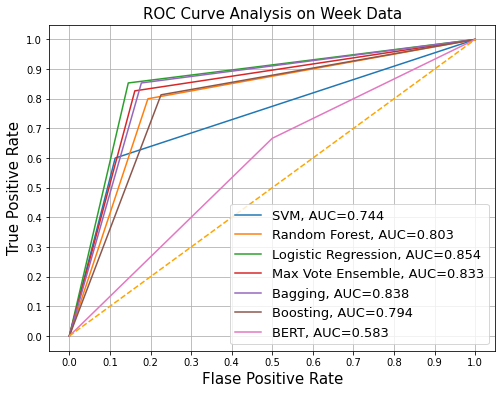

In [ ]:
AUC(Week, 'AUC_week.png', 'Week')

In [ ]:
Month = pd.read_csv('/content/drive/MyDrive/NLP Projects/Month results.csv')

In [ ]:
Month

classifiers                                 fpr  \
0                  SVM  [0.         0.11111111 1.        ]   
1        Random Forest  [0.         0.20634921 1.        ]   
2  Logistic Regression  [0.         0.14285714 1.        ]   
3    Max Vote Ensemble  [0.         0.17460317 1.        ]   
4              Bagging  [0.         0.19047619 1.        ]   
5             Boosting  [0.         0.25396825 1.        ]   
6                 BERT                          [0. 0. 1.]   

                                  tpr       auc  
0  [0.         0.56756757 1.        ]  0.728228  
1     [0.        0.7027027 1.       ]  0.748177  
2  [0.         0.74324324 1.        ]  0.800193  
3  [0.         0.74324324 1.        ]  0.784320  
4  [0.         0.77027027 1.        ]  0.789897  
5  [0.         0.81081081 1.        ]  0.778421  
6                       [0.  0.5 1. ]  0.750000

In [ ]:
data = [['SVM',	[0., 0.11111111, 1. ],	[0., 0.56756757, 1. ],	0.728228], ['Random Forest', [0., 0.20634921, 1. ],	[0., 0.7027027, 1. ],	0.748177],
        ['Logistic Regression',	[0., 0.14285714, 1. ],	[0., 0.74324324, 1. ],	0.800193], ['Max Vote Ensemble',	[0., 0.17460317, 1. ],	[0., 0.74324324, 1. ],	0.784320],
         ['Bagging',	[0., 0.19047619, 1. ],	[0., 0.77027027, 1. ],	0.789897], ['Boosting',	[0., 0.25396825, 1. ],	[0., 0.81081081, 1. ],	0.778421],
          ['BERT',	[0., 0., 1.],	[0., 0.5, 1. ],	0.750000]]
# Create the pandas DataFrame
Month = pd.DataFrame(data, columns=['classifiers', 'fpr', 'tpr', 'auc'])

Month

classifiers                     fpr                     tpr  \
0                  SVM  [0.0, 0.11111111, 1.0]  [0.0, 0.56756757, 1.0]   
1        Random Forest  [0.0, 0.20634921, 1.0]   [0.0, 0.7027027, 1.0]   
2  Logistic Regression  [0.0, 0.14285714, 1.0]  [0.0, 0.74324324, 1.0]   
3    Max Vote Ensemble  [0.0, 0.17460317, 1.0]  [0.0, 0.74324324, 1.0]   
4              Bagging  [0.0, 0.19047619, 1.0]  [0.0, 0.77027027, 1.0]   
5             Boosting  [0.0, 0.25396825, 1.0]  [0.0, 0.81081081, 1.0]   
6                 BERT         [0.0, 0.0, 1.0]         [0.0, 0.5, 1.0]   

        auc  
0  0.728228  
1  0.748177  
2  0.800193  
3  0.784320  
4  0.789897  
5  0.778421  
6  0.750000

In [ ]:
Month.set_index('classifiers', inplace=True)

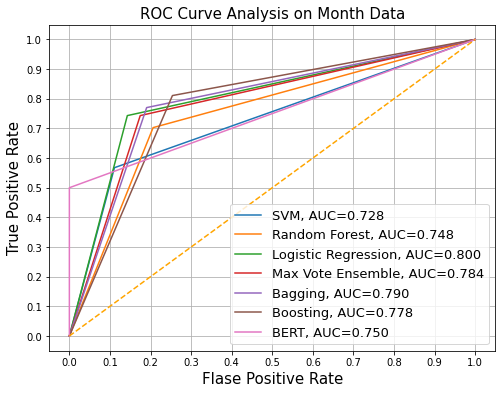

In [ ]:
AUC(Month, 'AUC_month_updated.png', 'Month')

In [ ]:
fullData = pd.read_csv('/content/drive/MyDrive/NLP Projects/3200 Tweetsresults.csv')

In [ ]:
fullData

classifiers                                 fpr  \
0                  SVM  [0.         0.09230769 1.        ]   
1        Random Forest  [0.         0.10769231 1.        ]   
2  Logistic Regression  [0.         0.07692308 1.        ]   
3    Max Vote Ensemble  [0.         0.03076923 1.        ]   
4              Bagging  [0.         0.03076923 1.        ]   
5             Boosting  [0.         0.01538462 1.        ]   
6                 BERT                          [0. 0. 1.]   

                                  tpr       auc  
0  [0.         0.81944444 1.        ]  0.863568  
1  [0.         0.90277778 1.        ]  0.897543  
2                 [0.    0.875 1.   ]  0.899038  
3  [0.         0.93055556 1.        ]  0.949893  
4  [0.         0.98611111 1.        ]  0.977671  
5  [0.         0.98611111 1.        ]  0.985363  
6                    [0.   0.75 1.  ]  0.875000

In [ ]:
data = [['SVM',	[0., 0.09230769, 1. ],	[0., 0.81944444, 1. ],	0.863568], ['Random Forest', [0., 0.10769231, 1. ],	[0., 0.90277778, 1. ],	0.897543],
        ['Logistic Regression',	[0., 0.07692308, 1. ],	[0., 0.875, 1. ],	0.899038], ['Max Vote Ensemble',	[0., 0.03076923, 1. ],	[0., 0.93055556, 1. ],	0.949893],
         ['Bagging',	[0., 0.03076923, 1. ],	[0., 0.98611111, 1. ],	0.977671], ['Boosting',	[0., 0.01538462, 1. ],	[0., 0.98611111, 1. ],	0.985363],
          ['BERT',	[0., 0., 1.],	[0., 0.75, 1. ],	0.875000]]
# Create the pandas DataFrame
fullData = pd.DataFrame(data, columns=['classifiers', 'fpr', 'tpr', 'auc'])

fullData

classifiers                     fpr                     tpr  \
0                  SVM  [0.0, 0.09230769, 1.0]  [0.0, 0.81944444, 1.0]   
1        Random Forest  [0.0, 0.10769231, 1.0]  [0.0, 0.90277778, 1.0]   
2  Logistic Regression  [0.0, 0.07692308, 1.0]       [0.0, 0.875, 1.0]   
3    Max Vote Ensemble  [0.0, 0.03076923, 1.0]  [0.0, 0.93055556, 1.0]   
4              Bagging  [0.0, 0.03076923, 1.0]  [0.0, 0.98611111, 1.0]   
5             Boosting  [0.0, 0.01538462, 1.0]  [0.0, 0.98611111, 1.0]   
6                 BERT         [0.0, 0.0, 1.0]        [0.0, 0.75, 1.0]   

        auc  
0  0.863568  
1  0.897543  
2  0.899038  
3  0.949893  
4  0.977671  
5  0.985363  
6  0.875000

In [ ]:
fullData.set_index('classifiers', inplace=True)

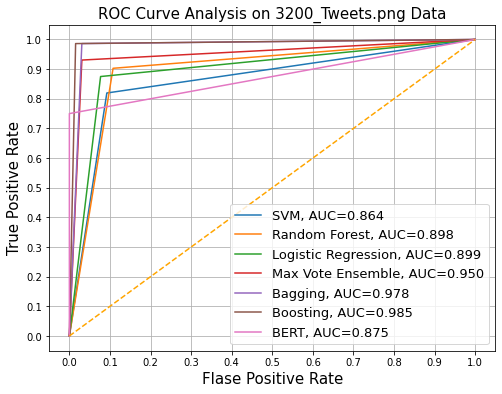

In [ ]:
AUC(fullData, '3200_Tweets.png', '3200_Tweets.png')